In [26]:
#Import data
import pandas as pd

df_swing = pd.read_csv('2008_swing_states.csv')
df_swing[['state', 'county', 'dem_share']].head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


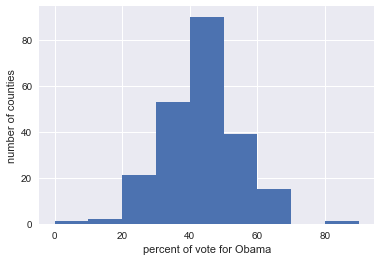

In [12]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
bin_edges = np.arange(0,100,10)
_ = df_swing.dem_share.hist(bins = bin_edges)
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

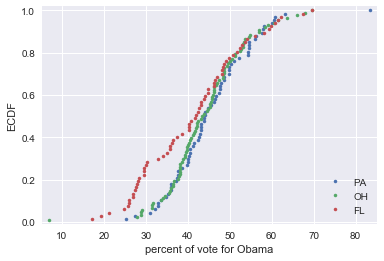

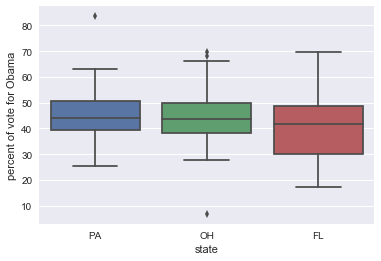

In [27]:
#Empirical Cumulative Distribution Function(ECDF)
import numpy as np

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1,len(x)+1)/len(x)
    return x, y;

states = df_swing['state'].unique()
for state in states:
    df_state = df_swing.loc[df_swing.loc[:,'state']==state,'dem_share']
    x, y = ecdf(df_state)
    _ = plt.plot(x,y, marker='.', linestyle='none')

plt.legend(states, loc='lower right')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

_ = sns.boxplot(x='state', y='dem_share',
               data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

In [28]:
np.mean(df_swing.dem_share)
np.median(df_swing.dem_share)
np.var(df_swing.dem_share)
np.std(df_swing.dem_share)
np.sqrt(np.var(df_swing.dem_share))

10.68861520157592

In [39]:
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]

pearson_r(df_swing.total_votes, df_swing.dem_share)

0.5361973649586781

### Probabilistic logic and statistical inference